In [44]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [2]:
# Let's load this data. I've kept the data in the same directory of the notebook!
train = pd.read_csv('blood-train.csv')
test = pd.read_csv('blood-test.csv')

#Unnamed:0 column - let's rename it to ID, renaming the donation column to Donation.
train = train.rename({'Unnamed: 0': 'Id','Made Donation in March 2007': 'Donation'}, axis='columns')
test = test.rename({'Unnamed: 0': 'Id','Made Donation in March 2007': 'Donation'}, axis='columns')

train_og=train #It's always a good measure to keep a copy of the original dataset, so we'll store it as train_og.
test_og=test #It's always a good measure to keep a copy of the original dataset, so we'll store it as test_og.


In [3]:
#Let's also take a look at their respective dimensions
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)
print(train.head())

Train Shape :  (576, 6)
Test Shape :  (200, 5)
    Id  Months since Last Donation  Number of Donations  \
0  619                           2                   50   
1  664                           0                   13   
2  441                           1                   16   
3  160                           2                   20   
4  358                           1                   24   

   Total Volume Donated (c.c.)  Months since First Donation  Donation  
0                        12500                           98         1  
1                         3250                           28         1  
2                         4000                           35         1  
3                         5000                           45         1  
4                         6000                           77         0  


In [72]:
train_y = train['Donation'] #Our Y(dependent variable)
train_x = train.drop(['Id'], axis=1).values #Our X's(independent variables)
test_x = test.drop(['Id'], axis=1).values #Our test datasets X's(independent variables)
test_id = test['Id']

In [67]:
train_y.head() #spot checking

0    1
1    1
2    1
3    1
4    0
Name: Donation, dtype: int64

In [68]:
train_x[:10] #spot checking

array([[    2,    50, 12500,    98,     1],
       [    0,    13,  3250,    28,     1],
       [    1,    16,  4000,    35,     1],
       [    2,    20,  5000,    45,     1],
       [    1,    24,  6000,    77,     0],
       [    4,     4,  1000,     4,     0],
       [    2,     7,  1750,    14,     1],
       [    1,    12,  3000,    35,     0],
       [    5,    46, 11500,    98,     1],
       [    0,     3,   750,     4,     0]])

In [69]:
test_x[:10] #spot checking

array([[   2,   12, 3000,   52],
       [  21,    7, 1750,   38],
       [   4,    1,  250,    4],
       [  11,   11, 2750,   38],
       [   4,   12, 3000,   34],
       [   3,   21, 5250,   42],
       [   4,    2,  500,    4],
       [  14,    1,  250,   14],
       [  23,    2,  500,   87],
       [  14,    4, 1000,   64]])

In [70]:
cv = KFold(n_splits=10) # We are going for a 10-Fold cross validation technique to train out model
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

for depth in depth_range: # We want to explore depths from 1 to the maximum number of attributes
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    for train_fold, valid_fold in cv.split(train_x):
        f_train = train_x[train_fold]
        f_valid = train_x[valid_fold]
        model = tree_model.fit(X = f_train[:, :-1], y = f_train[:, -1]) 
        valid_acc = model.score(X = f_valid[:, :-1],y = f_valid[:, -1])
        fold_accuracy.append(valid_acc)

    Average_accuracy = sum(fold_accuracy)/len(fold_accuracy) #just takin the average fold accuracy
    accuracies.append(Average_accuracy)
    print("Accuracy by fold: ", fold_accuracy, "\n")
    print("Overall accuracy: ", Average_accuracy)
    print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

Accuracy by fold:  [0.41379310344827586, 0.6724137931034483, 0.7413793103448276, 0.8275862068965517, 0.8103448275862069, 0.9482758620689655, 0.7368421052631579, 0.631578947368421, 0.8947368421052632, 0.9298245614035088] 

Overall accuracy:  0.7606775559588626


Accuracy by fold:  [0.41379310344827586, 0.6724137931034483, 0.6724137931034483, 0.7068965517241379, 0.8103448275862069, 0.9482758620689655, 0.7368421052631579, 0.631578947368421, 0.8245614035087719, 0.9298245614035088] 

Overall accuracy:  0.7346944948578342


Accuracy by fold:  [0.6379310344827587, 0.6379310344827587, 0.7586206896551724, 0.8103448275862069, 0.8103448275862069, 0.9137931034482759, 0.7719298245614035, 0.6842105263157895, 0.8947368421052632, 0.9298245614035088] 

Overall accuracy:  0.7849667271627343


Accuracy by fold:  [0.5862068965517241, 0.6379310344827587, 0.7586206896551724, 0.8103448275862069, 0.8103448275862069, 0.9137931034482759, 0.7719298245614035, 0.6842105263157895, 0.8947368421052632, 0.929824561403

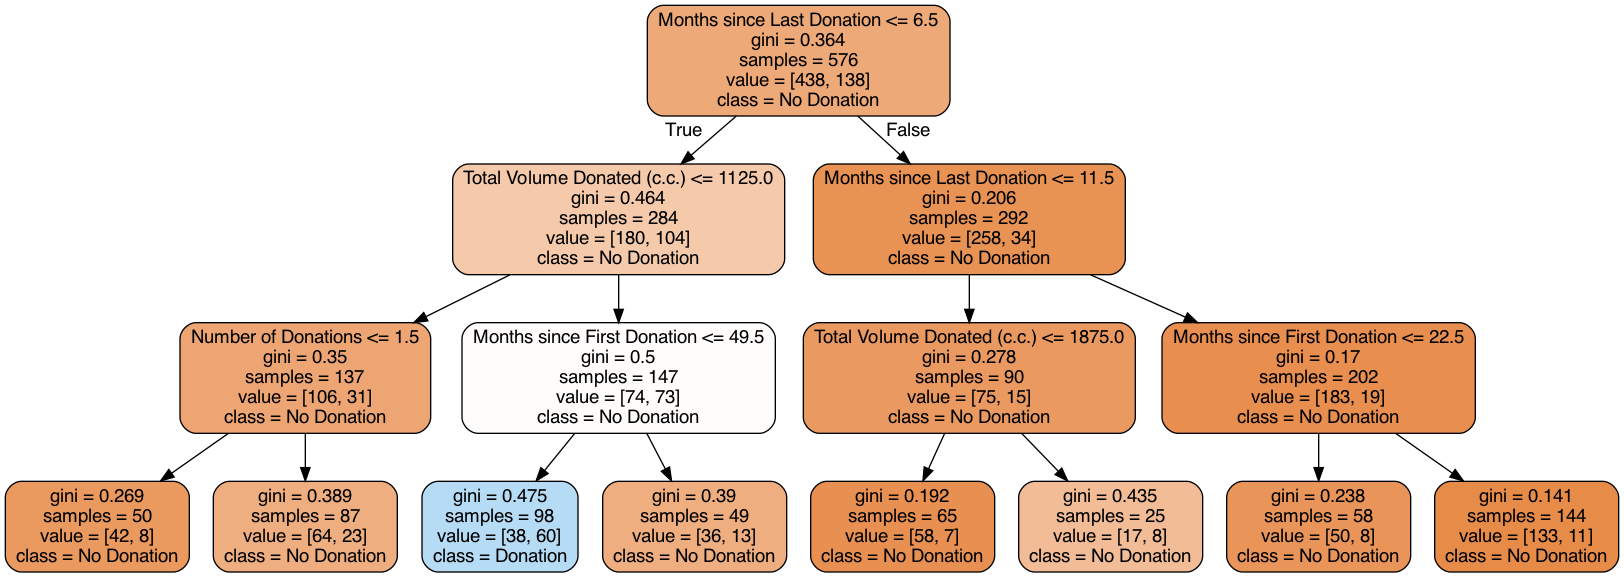

In [87]:
font = ImageFont.load_default()

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(train_x[:, :-1], train_y)

# Our test dataset does not have "actual results". We'll use what we know to predict if these will be donors.
y_pred = decision_tree.predict(test_x)
submission = pd.DataFrame({"Donation": y_pred,
                          "Id" : test_id})
submission.to_csv('submission.csv', index=False)

# make sure you have graphviz installed. This will take our tree and visualize it. 
with open("DonorTree.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train.drop(['Donation','Id'], axis=1)),
                              class_names = ['No Donation', 'Donation'],
                              rounded = True,
                              filled= True )
        
#In order for us to display this in our notebook we have to convert .dot to png.
check_call(['dot','-Tpng','DonorTree.dot','-o','DonorTree.png'])
img = Image.open("DonorTree.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")


In [39]:
acc_decision_tree = round(decision_tree.score(train_x[:, :-1], train_y) * 100, 2)
acc_decision_tree

79.86